In [35]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance.Result import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_exfiltration_time_df, get_data_exfiltration_cdf, total_control_host_capture_times
from statistics import mean
import seaborn as sns
# set seaborn font size
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("pastel")

import pandas as pd

In [36]:
# Data
data = {
    'Launch': [
        425.1, 447.1, 446.1, 453.6, 435.8,
        154.8, 149.4, 151.9, 149.9, 153.6,
        158.5, 144.1, 141, 150, 141,
        221.7, 211.6, 220.8, 217.3379433, 214.294714,
        212.1353958, 182.4004116, 179.3989351, 177.7602866, 177.6630113,
        63, 62.1, 62.61887383, 62.23279428, 62.95240879,
    ],
    'Environment': ['Equifax', 'Equifax', 'Equifax', 'Equifax', 'Equifax',
                    'ICS', 'ICS', 'ICS', 'ICS', 'ICS',
                    'Chain', 'Chain', 'Chain', 'Chain', 'Chain',
                    'Star', 'Star', 'Star', 'Star', 'Star',
                    'Dumbbell', 'Dumbbell', 'Dumbbell', 'Dumbbell', 'Dumbbell',
                    'Enterprise', 'Enterprise', 'Enterprise', 'Enterprise', 'Enterprise',],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert Setup time from seconds to minutes
df['Launch'] = df['Launch'] / 60

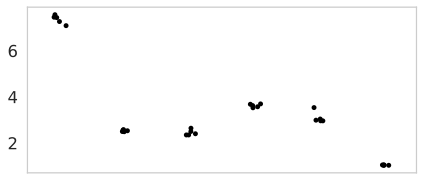

In [37]:
# Create a stripplot
plt.figure(figsize=(7, 3))
sns.stripplot(x='Environment', y='Launch', data=df, jitter=True, color='black')

# Hide x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Hide x ticks
plt.xticks([])

# Save as SVG file
plt.savefig('plots/launch_time.svg', format='svg', bbox_inches='tight')

In [38]:
data = {
    'Setup': [5220.85319, 5826.672148, 3244.1, 3079, 3996.094548, 2127.156868],
    'Environment': ['Equifax', 'ICS', 'Chain', 'Star', 'Dumbbell', 'Enterprise']
}

# Create a DataFrame
df = pd.DataFrame(data)
df['Setup'] = df['Setup'] / 60

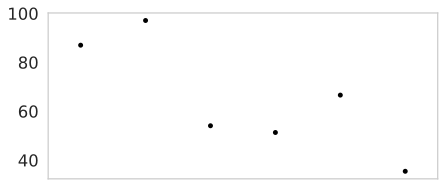

In [39]:
# Create a stripplot
plt.figure(figsize=(7, 3))
sns.stripplot(x='Environment', y='Setup', data=df, jitter=True, color='black')

# Hide x ticks
plt.xticks([])

# Hide x and y axis labels
plt.xlabel('')
plt.ylabel('')

plt.savefig('plots/setup_time.svg', format='svg', bbox_inches='tight')